# Desafio Coodesh - Análise Exploratória dos Dados
Análise dos dados gerados na etapa de transformação utilizando Python, Pandas e MatplotLib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style="darkgrid")

In [2]:
DIR_DATASETS = r"./analytics"

dfTitulos = pd.read_csv(f"{DIR_DATASETS}/titles.csv")
dfElenco = pd.read_csv(f"{DIR_DATASETS}/casting_title.csv")
dfPaises = pd.read_csv(f"{DIR_DATASETS}/countries_title.csv")
dfCategorias = pd.read_csv(f"{DIR_DATASETS}/categories_title.csv")
dfDiretores = pd.read_csv(f"{DIR_DATASETS}/directors_title.csv")

### 1- Top 10 atores/atrizes considerando todos os dados;

In [3]:
groupElenco = dfElenco.groupby(["artist"])["artist"].count().reset_index(name="count")

top10Atores = groupElenco.sort_values(by="count",ascending=False).head(10)
top10Atores

,artist,count
4548,Anupam Kher,59
35088,Maggie Binkley,56
2803,Amitabh Bachchan,47
51057,Shah Rukh Khan,46
40699,Nassar,43
1298,Akshay Kumar,41
40684,Naseeruddin Shah,39
12867,Danny Trejo,39
43130,Paresh Rawal,39
5,1,35


[]

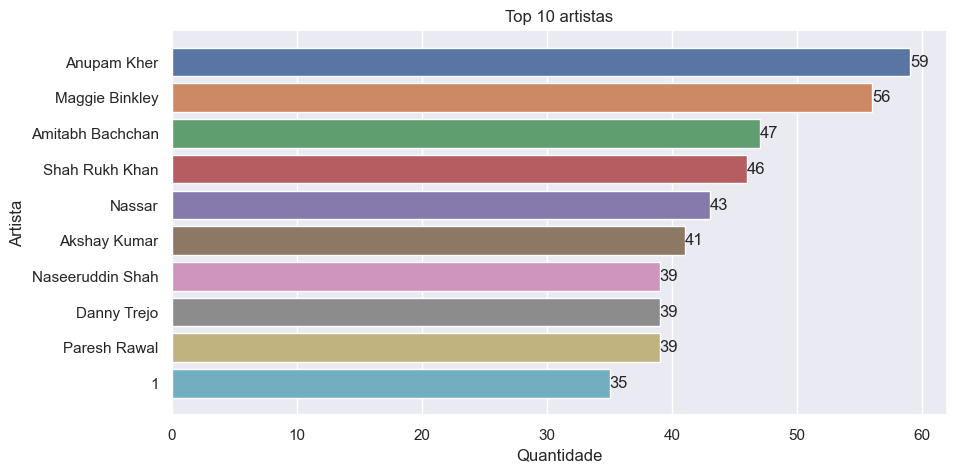

In [4]:
f, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(
    data=top10Atores, x="count", y="artist",
)

ax.set_title('Top 10 artistas')
ax.set_xlabel('Quantidade')
ax.set_ylabel('Artista')
ax.bar_label(ax.containers[0])


ax.plot()

### 2- Top 5 países produtores de conteúdos considerando todos os dados e comparando as duas plataformas;

In [5]:
producoesPorPaisPlataforma = pd.pivot_table(
    dfPaises,
    values=["title_id"],
    index=["country"],
    columns=["platform"],aggfunc="count",fill_value=0)

producoesPorPaisPlataforma.loc[:,'total'] = producoesPorPaisPlataforma.sum(numeric_only=True, axis=1)

producoesPorPaisPlataforma.sort_values("total", ascending=False).head(5)

title_id         total
platform       Amazon Prime Netflix      
country                                  
United States           334    3690  4024
India                   246    1046  1292
United Kingdom           67     806   873
Canada                   35     445   480
France                   20     393   413

[]

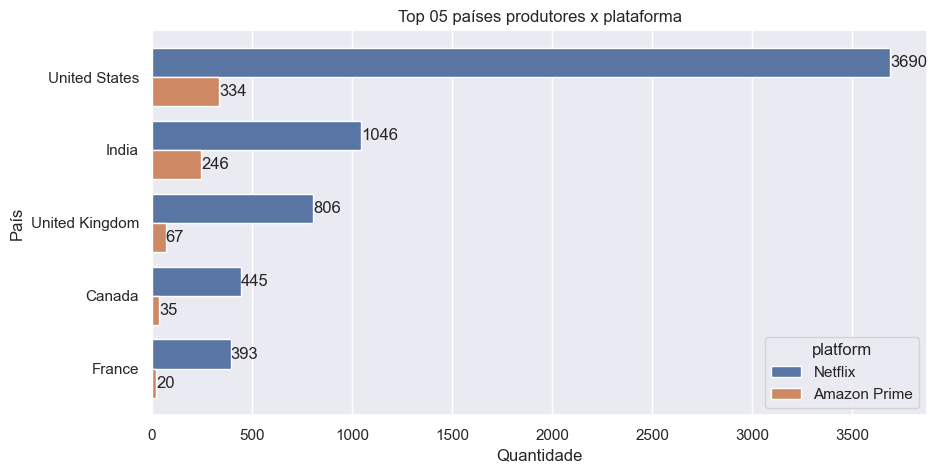

In [6]:
df = dfPaises.groupby(["country","platform"]).count()
f, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(data=dfPaises, 
                   y="country",
                   hue="platform",
                  order=dfPaises.country.value_counts().iloc[:5].index)

ax.set_title('Top 05 países produtores x plataforma')
ax.set_xlabel('Quantidade')
ax.set_ylabel('País')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.plot()

## Conteúdo das plataformas x Tipo

[]

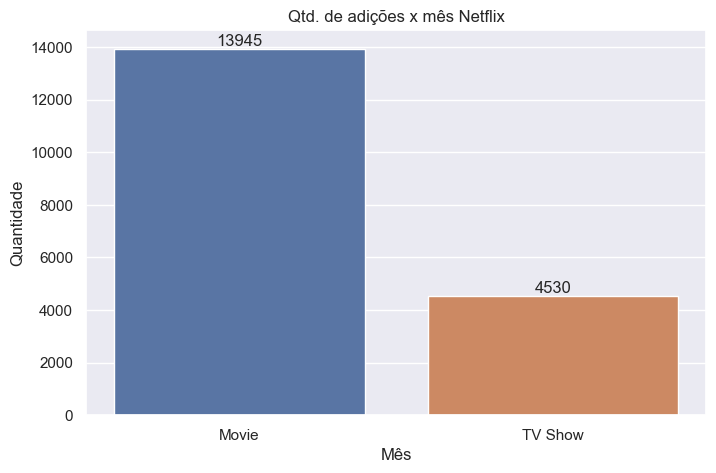

In [7]:
f, ax = plt.subplots(figsize=(8, 5))
ax = sns.countplot(
    data=dfTitulos, x="type"
)
ax.set_title('Qtd. de adições x mês Netflix')
ax.set_xlabel('Mês')
ax.set_ylabel('Quantidade')
ax.bar_label(ax.containers[0])
ax.plot()

### 3- Mês no qual há mais adições de filmes na plataforma Netflix;

In [8]:
dfTitulos["date_added"]=pd.to_datetime(dfTitulos["date_added"])
dfFilmesNetflix = dfTitulos.loc[(dfTitulos["platform"]=="Netflix") & (dfTitulos["type"]=="Movie")]

inclusoesPorMes = dfFilmesNetflix.groupby(["platform",dfFilmesNetflix["date_added"].dt.strftime("%m")])["title_id"].count()
dfInclusoesPorMes = pd.DataFrame(inclusoesPorMes).reset_index()
dfInclusoesPorMes.rename(columns={"date_added": "month","title_id": "total"},inplace=True)

dfInclusoesPorMes.sort_values("total", ascending=False).head(1)

,platform,month,total
6,Netflix,07,565


[]

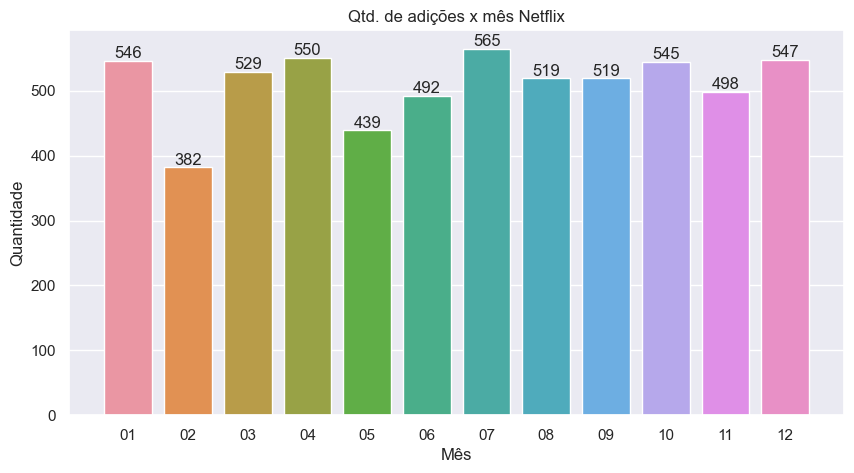

In [9]:
f, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(
    data=dfInclusoesPorMes, y="total", x="month",
)
ax.set_title('Qtd. de adições x mês Netflix')
ax.set_xlabel('Mês')
ax.set_ylabel('Quantidade')
ax.bar_label(ax.containers[0])
ax.plot()

### 4- Quantidade de filmes listados como comédia.

In [10]:

dfCategoriasComTipo = dfCategorias.merge(
    dfTitulos.rename({'title_id': 'title_id_t'}, axis=1),
    left_on='title_id',right_on="title_id_t",
    how='left')[["title_id","category","type","platform"]]

dfTitulosPorCategoria = pd.DataFrame(dfCategoriasComTipo.groupby(["category","type"]).count()).reset_index()
dfFilmesComedia = dfTitulosPorCategoria.loc[
    (dfTitulosPorCategoria["category"].str.contains("Comed")) & 
    (dfTitulosPorCategoria["type"]=="Movie")
][["category","title_id"]].rename(columns={"title_id":"total"})



print(f"A quantidade filmes listados como comédia são {dfFilmesComedia['total'].sum()}, \
consideraando as categorias abaixo:")

dfFilmesComedia


A quantidade filmes listados como comédia são 3838, consideraando as categorias abaixo:


,category,total
19,Comedies,1674
20,Comedy,1821
78,Stand-Up Comedy,343


[]

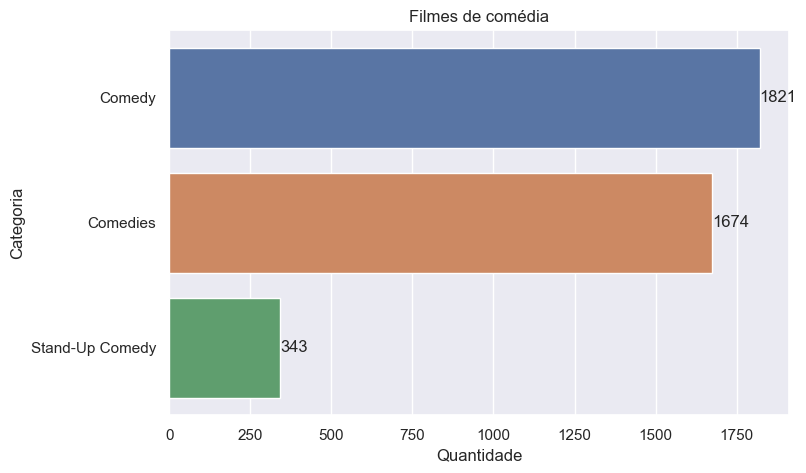

In [11]:
f, ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(
    data=dfFilmesComedia.sort_values("total",ascending=False), y="category", x="total",
)

ax.set_title('Filmes de comédia')
ax.set_xlabel('Quantidade')
ax.set_ylabel('Categoria')
ax.bar_label(ax.containers[0])

ax.plot()

### 5- Lista de todos os gêneros de filmes.

In [12]:
dfCatetoriasFilme = dfTitulosPorCategoria.loc[
    (dfTitulosPorCategoria["type"]=="Movie")
]

dfResumoCategoriasFilme=pd.DataFrame(
    dfCatetoriasFilme.groupby(["category","type"]).sum()
).reset_index()[["category","type","title_id"]]

pd.set_option('display.max_rows', df.shape[0]+1)
dfResumoCategoriasFilme.rename(columns={"title_id":"total"})

,category,type,total
0,Action,Movie,1502
1,Action & Adventure,Movie,859
2,Adventure,Movie,230
3,Animation,Movie,279
4,Anime,Movie,29
5,Anime Features,Movie,71
6,Arthouse,Movie,140
7,Arts,Movie,444
8,Children & Family Movies,Movie,641
9,Classic Movies,Movie,116


### 6- A frequência de "TV Show" de todos os dados e comparativamente em relação as duas plataformas

In [13]:
dfTvShow = dfTitulos.loc[(dfTitulos["type"]=="TV Show")]
dfTvShow.groupby(["platform"])["title_id"].count()

platform
Amazon Prime    1854
Netflix         2676
Name: title_id, dtype: int64

[]

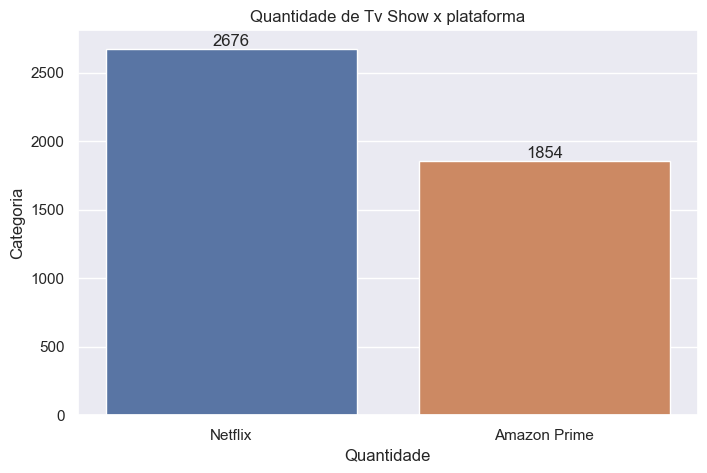

In [14]:
f, ax = plt.subplots(figsize=(8, 5))
ax = sns.countplot(
    data=dfTvShow, x="platform", 
)

ax.set_title('Quantidade de Tv Show x plataforma')
ax.set_xlabel('Quantidade')
ax.set_ylabel('Categoria')
ax.bar_label(ax.containers[0])

ax.plot()

In [15]:
dfMovies = dfTitulos.loc[(dfTitulos["type"]=="Movie")]
dfMovies.groupby(["platform"])["title_id"].count()

platform
Amazon Prime    7814
Netflix         6131
Name: title_id, dtype: int64

### 7- A frequência de "Movies" de todos os dados e comparativamente em relação as duas plataformas












In [16]:
dfTiposPlataforma = pd.pivot_table(dfTitulos, index= ['type'], columns = ['platform'], values=['title_id'], aggfunc = 'count')
dfTiposPlataforma.loc[:,'total'] = dfTiposPlataforma.sum(numeric_only=True, axis=1)

dfTiposPlataforma.reset_index()

type     title_id          total
platform          Amazon Prime Netflix       
0           Movie         7814    6131  13945
1         TV Show         1854    2676   4530

[]

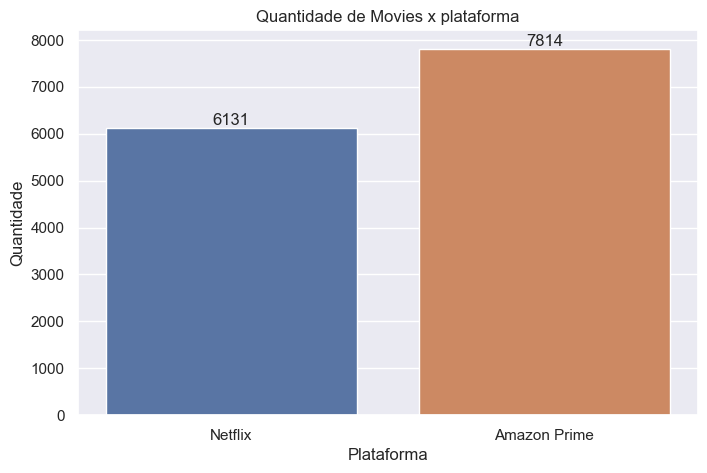

In [17]:
f, ax = plt.subplots(figsize=(8, 5))
ax = sns.countplot(
    data=dfMovies, x="platform", 
)

ax.set_title('Quantidade de Movies x plataforma')
ax.set_xlabel('Plataforma')
ax.set_ylabel('Quantidade')
ax.bar_label(ax.containers[0])

ax.plot()